Import thư viện

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    roc_curve, 
    recall_score, 
    confusion_matrix, 
    precision_score, 
    f1_score, 
    accuracy_score, 
    classification_report
    )


Load dữ liệu

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv", engine='c')
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

Summarize và pre-process dữ liệu

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info(show_counts=True, verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
customerID = df.customerID
df.drop(["customerID"], axis=1, inplace=True)

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85          2505      0  
1                 0              3           56.95          1466      0  
2                 1              3           53.85           157      1  
3                 0              0           42.30          1400      0  
4                 1              2           70.70           925      1

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

# Fit với SVM, Decision Tree, Random Forest và đưa ra dự đoán

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40)
X_train_c, X_test_c, y_train_c, y_test_c = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [ ]:
cls = SVC(random_state=1)
cls.fit(X_train_c, y_train_c)
test_pred = cls.predict(X_test)
print(classification_report(test_pred, y_test_c))

              precision    recall  f1-score   support

           0       1.00      0.73      0.85      2113
           1       0.00      0.00      0.00         0

    accuracy                           0.73      2113
   macro avg       0.50      0.37      0.42      2113
weighted avg       1.00      0.73      0.85      2113



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cls = DecisionTreeClassifier(random_state=1)
cls.fit(X_train_c, y_train_c)
test_pred = cls.predict(X_test)
print(classification_report(test_pred, y_test_c))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1515
           1       0.52      0.48      0.50       598

    accuracy                           0.73      2113
   macro avg       0.66      0.65      0.66      2113
weighted avg       0.72      0.73      0.72      2113



In [ ]:
cls = RandomForestClassifier(random_state=1)
cls.fit(X_train_c, y_train_c)
test_pred = cls.predict(X_test)
print(classification_report(test_pred, y_test_c))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1667
           1       0.46      0.58      0.51       446

    accuracy                           0.77      2113
   macro avg       0.67      0.70      0.68      2113
weighted avg       0.79      0.77      0.78      2113



Dựa vào kết quả đưa ra của 2 model, ngay lập tức chúng ta có thể nhận thấy rằng Decision Tree có khả năng tốt hơn SVM. SVM output ra kết quả với tất cả các sample có label là 0, tuy rằng chỉ số accuracy là 0.73. Nếu chỉ đọc qua kết quả mà không inspect dữ liệu, người đọc có thể thấy rằng kết quả không tệ. Tuy vậy, điều này cũng tương tự như khi chơi đoán kết quả khi tung đồng xu, đoán tất cả là mặt ngửa (thông thường trong trường hợp này khi tung đủ nhiều chúng ta sẽ có khoảng 50% chính xác, theo [quy luật số lớn trong xác suất](https://www.probabilitycourse.com/chapter7/7_1_1_law_of_large_numbers.php)), và bằng một cách nào đó, ví dụ một mặt của đồng xu nặng hơn, và một mặt xuất hiện 73% số lần tung. Điều này chứng tỏ SVM đã hoạt động không hề tốt đối với bộ dữ liệu Churn. Nhìn sang phía Decision Tree hay Random Forest, model có chỉ số accuracy tương đương đối với SVM, tuy vậy cả 2 model đã phần nào dự đoán được các trường hợp có churn là positive, f1-score của 2 model có chút thấp hơn trong trường hợp dữ liệu là 0, tuy vậy, SVM có chỉ số tốt là vì output đưa ra hoàn toàn là 0, khiến cho recall trong trường hợp này là 1.

# Model Tuning với GridsearchCV

In [ ]:
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000], 
              'gamma': [0.1, 0.01, 0.001, 0.0001, 0.00001],
              'kernel': ['rbf', 'sigmoid']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train_c, y_train_c)
grid_predictions = grid.predict(X_test)
# print classification report with GridSearchCV
print(classification_report(grid_predictions, y_test_c))

Fitting 5 folds for each of 70 candidates, totalling 350 fits
[CV 1/5] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.735 total time=   0.6s
[CV 2/5] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.734 total time=   0.6s
[CV 3/5] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.734 total time=   0.6s
[CV 4/5] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.734 total time=   0.6s
[CV 5/5] END ...C=0.0001, gamma=0.1, kernel=rbf;, score=0.734 total time=   0.6s
[CV 1/5] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.735 total time=   0.4s
[CV 2/5] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.734 total time=   0.4s
[CV 3/5] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.734 total time=   0.4s
[CV 4/5] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.734 total time=   0.4s
[CV 5/5] END C=0.0001, gamma=0.1, kernel=sigmoid;, score=0.734 total time=   0.4s
[CV 1/5] END ..C=0.0001, gamma=0.01, kernel=rbf;, score=0.735 total time=   0.6s
[CV 2/5] END ..C=0.0001, gamma=0.01, kerne

## Gridseach CV với RandomForestClassifier

In [ ]:
param_grid = {"n_estimators": [50,100,200,500],
              "max_depth": [None, 5,7,15,20],
              "min_samples_split": [2,3,4],
              "min_samples_leaf": [1,2,3,4],
              "max_features": ["sqrt", "log2"],
              "n_jobs": [-1],
              } 

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3, cv=2)
grid.fit(X_train_c, y_train_c)
grid_predictions = grid.predict(X_test)
# print classification report with GridSearchCV
print(classification_report(grid_predictions, y_test_c))

Fitting 2 folds for each of 480 candidates, totalling 960 fits
[CV 1/2] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1;, score=0.805 total time=   1.6s
[CV 2/2] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, n_jobs=-1;, score=0.790 total time=   0.2s
[CV 1/2] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1;, score=0.800 total time=   0.5s
[CV 2/2] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, n_jobs=-1;, score=0.793 total time=   0.4s
[CV 1/2] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1;, score=0.802 total time=   0.8s
[CV 2/2] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1;, score=0.794 total time=   0.8s
[CV 1/2] END max_depth=None, max_featur

##Feature Importance

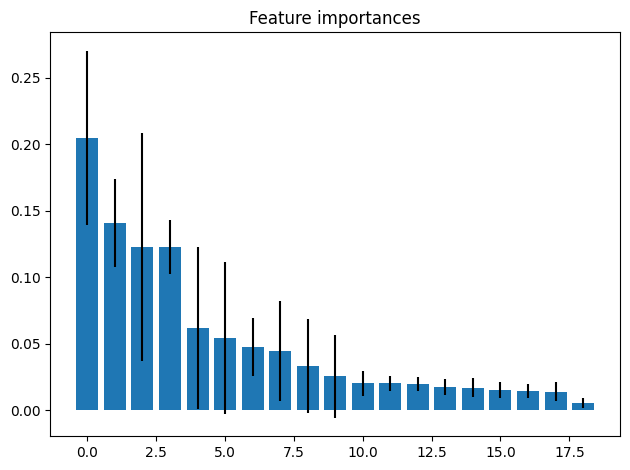

In [ ]:
random_forest_feat_imp = grid.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in grid.best_estimator_.estimators_], axis=0)
indices = np.argsort(random_forest_feat_imp)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), random_forest_feat_imp[indices], yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), [df[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

## Gridseach CV với DecisionTreeClassifier

In [ ]:
param_grid = {"max_depth": [None, 5,7,15,20],
              "min_samples_split": [2,3,4],
              "min_samples_leaf": [1,2,3,4],
              "max_features": ["sqrt", "log2"],
              
              } 

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3, cv=2)
grid.fit(X_train_c, y_train_c)
grid_predictions = grid.predict(X_test)
# print classification report with GridSearchCV
print(classification_report(grid_predictions, y_test_c))

Fitting 2 folds for each of 120 candidates, totalling 240 fits
[CV 1/2] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.734 total time=   0.0s
[CV 2/2] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.737 total time=   0.0s
[CV 1/2] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3;, score=0.748 total time=   0.0s
[CV 2/2] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3;, score=0.738 total time=   0.0s
[CV 1/2] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4;, score=0.744 total time=   0.0s
[CV 2/2] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4;, score=0.737 total time=   0.0s
[CV 1/2] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2;, score=0.750 total time=   0.0s
[CV 2/2] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2;, 

##Feature Importance

# Optional: Tự implement lại Decistion Tree và fit với dữ liệu Customer Churn, so sánh kết quả của model của Sklearn

In [ ]:
import math

def divide_on_feature(X, feature_i, threshold):
    split_func = None
    if isinstance(threshold, int) or isinstance(threshold, float):
        split_func = lambda sample: sample[feature_i] >= threshold
    else:
        split_func = lambda sample: sample[feature_i] == threshold

    X_1 = np.array([sample for sample in X if split_func(sample)])
    X_2 = np.array([sample for sample in X if not split_func(sample)])

    return np.array([X_1, X_2])


def calculate_entropy(y):
    """ Calculate the entropy of label array y """
    log2 = lambda x: math.log(x) / math.log(2)
    unique_labels = np.unique(y)
    entropy = 0
    for label in unique_labels:
        count = len(y[y == label])
        p = count / len(y)
        entropy += -p * log2(p)
    return entropy



class DecisionNode:
    def __init__(self, feature_i=None, threshold=None,
                 value=None, true_branch=None, false_branch=None):
        self.feature_i = feature_i          # Index for the feature that is tested
        self.threshold = threshold         
        self.value = value                  
        self.true_branch = true_branch      
        self.false_branch = false_branch    


class DecisionTreeClassifier:
    def __init__(self, min_samples_split=2, 
                 min_impurity=1e-7,
                 max_depth=float("inf"), 
                 loss=None):
        self.root = None  
        self.min_samples_split = min_samples_split
        self.min_impurity = min_impurity
        self.max_depth = max_depth
        self._impurity_calculation = None
        self._leaf_value_calculation = None
        self.one_dim = None
        self.loss = loss



    def _build_tree(self, X, y, current_depth=0):
        largest_impurity = 0
        best_criteria = None    
        best_sets = None

        if len(np.shape(y)) == 1:
            y = np.expand_dims(y, axis=1)

        Xy = np.concatenate((X, y), axis=1)
        n_samples, n_features = np.shape(X)

        if n_samples >= self.min_samples_split and current_depth <= self.max_depth:
            # Calculate the impurity for each feature
            for feature_i in range(n_features):
                feature_values = np.expand_dims(X[:, feature_i], axis=1)
                unique_values = np.unique(feature_values)
                for threshold in unique_values:
                    Xy1, Xy2 = divide_on_feature(Xy, feature_i, threshold)

                    if len(Xy1) > 0 and len(Xy2) > 0:
                        y1 = Xy1[:, n_features:]
                        y2 = Xy2[:, n_features:]

                        impurity = self._impurity_calculation(y, y1, y2)
                        # Nếu information gain cao hơn previous thì mình save lại
                        if impurity > largest_impurity:
                            largest_impurity = impurity
                            best_criteria = {"feature_i": feature_i, "threshold": threshold}
                            best_sets = {
                                "leftX": Xy1[:, :n_features],   
                                "lefty": Xy1[:, n_features:],   
                                "rightX": Xy2[:, :n_features],  
                                "righty": Xy2[:, n_features:]  
                                }

        if largest_impurity > self.min_impurity:
            # Build subtrees for the right and left branches
            true_branch = self._build_tree(best_sets["leftX"], best_sets["lefty"], current_depth + 1)
            false_branch = self._build_tree(best_sets["rightX"], best_sets["righty"], current_depth + 1)
            return DecisionNode(feature_i=best_criteria["feature_i"], threshold=best_criteria[
                                "threshold"], true_branch=true_branch, false_branch=false_branch)

        leaf_value = self._leaf_value_calculation(y)

        return DecisionNode(value=leaf_value)


    def _calculate_information_gain(self, y, y1, y2):
        # Calculate information gain
        p = len(y1) / len(y)
        entropy = calculate_entropy(y)
        info_gain = entropy - p * \
            calculate_entropy(y1) - (1 - p) * \
            calculate_entropy(y2)

        return info_gain

    def fit(self, X, y):
        self._impurity_calculation = self._calculate_information_gain
        self._leaf_value_calculation = self._majority_vote
        self.one_dim = len(np.shape(y)) == 1
        self.root = self._build_tree(X, y)
        self.loss=None


    def predict_value(self, x, tree=None):
        if tree is None:
            tree = self.root

        if tree.value is not None:
            return tree.value

        feature_value = x[tree.feature_i]
        branch = tree.false_branch

        if isinstance(feature_value, int) or isinstance(feature_value, float):
            if feature_value >= tree.threshold:
                branch = tree.true_branch
        elif feature_value == tree.threshold:
            branch = tree.true_branch

        return self.predict_value(x, branch)

    def predict(self, X):
        y_pred = [self.predict_value(sample) for sample in X]
        return y_pred

    def print_tree(self, tree=None, sep=" "):
        """ In-order tree traversal - a recursive algorithm"""
        if not tree:
            tree = self.root
        if tree.value is not None:
            print(tree.value)
        else:
            print(f"{tree.feature_i}:{tree.threshold}?")
            print(f"{sep}T->", end="")
            self.print_tree(tree.true_branch, indent + indent)
            print(f"{sep}F->", end="")
            self.print_tree(tree.false_branch, indent + indent)

In [ ]:
cls = DecisionTree()
cls.fit(X_train_c.values, y_train_c)
test_pred = cls.predict(X_test.values)
print(classification_report(test_pred, y_test_c))

<ipython-input-30-c2c2925eb4ce>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([X_1, X_2])


              precision    recall  f1-score   support

         0.0       0.81      0.82      0.81      1535
         1.0       0.50      0.48      0.49       578

    accuracy                           0.72      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.72      0.72      0.72      2113

